In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
X = np.array([[158,64],[170,86],[183,84],[191,80],[155,49],[163,59],[180,67],[158,54],[170,67]])

In [48]:
y = ['male','male','male','male','female','female','female','female','female']

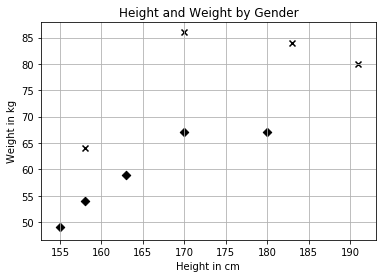

In [49]:
plt.title('Height and Weight by Gender')
plt.grid(True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
for i,x in enumerate(X):
    plt.scatter(x[0],x[1],c='k',marker='x' if y[i]=='male' else 'D')

In [50]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_binarized = lb.fit_transform(y)
y_binarized = y_binarized.reshape(-1)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y_binarized)

In [53]:
X_train

array([[183,  84],
       [170,  86],
       [170,  67],
       [158,  54],
       [158,  64],
       [180,  67]])

In [54]:
X_test

array([[155,  49],
       [163,  59],
       [191,  80]])

In [55]:
from sklearn.linear_model.logistic import LogisticRegression

In [56]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
y_test

array([0, 0, 1])

In [59]:
y_pred

array([0, 0, 1])

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix = confusion_matrix(y_test,y_pred)

In [62]:
print(confusion_matrix)

[[2 0]
 [0 1]]


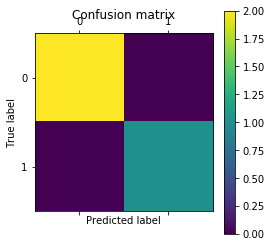

In [63]:
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
scores = cross_val_score(classifier,X_train,y_train)

In [66]:
scores

array([0.5, 1. , 0.5])